# Function that generates the frames of when something important happens

#### i.e. when the shrimp are "close" to each other
#### The function takes in a dataframe that is outputted throug tracktor, and identifies when the two objectd are close to each other within a certain threshhold of distance

In [7]:
# First, load necessary packages 

import numpy as np
import pandas as pd
import tracktor as tr
import cv2
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

In [22]:
# Then, read in the CSV file

ashley_test = pd.read_csv('/Users/lukefields/Downloads/BlackWhiteResultshrimp222_tracked.csv')

### This is our function, use 60 fps for the frames

In [23]:
def dist_between(dataframe, fps):    
    for idx, ID in enumerate(np.unique(dataframe['id'])):
        dataframe['id'][dataframe['id'] == ID] = idx
        
    distances = []
    for fr in np.unique(dataframe['frame']):
        tmp = dataframe[dataframe['frame'] == fr]
        x = tmp[tmp['id'] == 0]['pos_x'].values[0] - tmp[tmp['id'] == 1]['pos_x'].values[0]
        y = tmp[tmp['id'] == 0]['pos_y'].values[0] - tmp[tmp['id'] == 1]['pos_y'].values[0]
        distances.append(np.sqrt(x**2 + y**2))
        
    timestamp = np.unique(dataframe['frame'])/fps
    frame = np.unique(dataframe["frame"])
    
    dist_df = pd.DataFrame([frame, timestamp, distances]).transpose()
    dist_df.columns = ["Frame", "Timestamp", "Distance"]
    
    return dist_df

In [30]:
# Now, simply apply the function to our dataframe of interest and assign it to a variable

ashley_test_dist = dist_between(ashley_test, 60)
ashley_test_dist

/var/folders/n2/x_q5fj895dg04jddh7fb9m000000gn/T/ipykernel_69967/1466635496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['id'][dataframe['id'] == ID] = idx


,Frame,Timestamp,Distance
0,3.0,0.050000,126.321020
1,4.0,0.066667,122.200655
2,5.0,0.083333,124.145076
3,6.0,0.100000,127.192767
4,7.0,0.116667,127.251719
...,...,...,...
1626,1629.0,27.150000,706.385164
1627,1630.0,27.166667,710.371734
1628,1631.0,27.183333,706.223761
1629,1632.0,27.200000,711.130087


### Cool, now we have every frame of the video corresponding to the distance between the two shrimp, but how do we know when they are close?

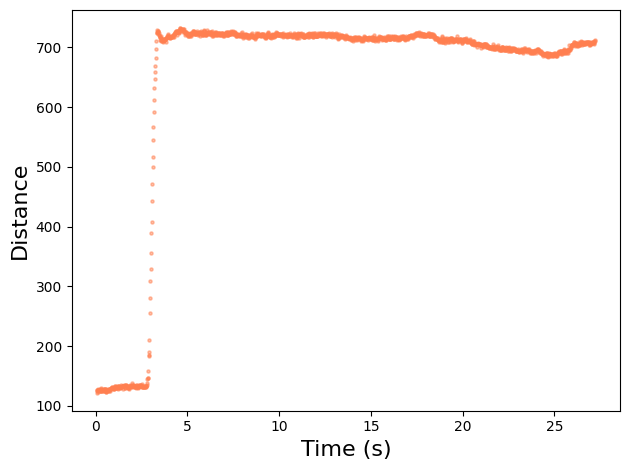

In [35]:
# First, I like to graph the distance between the two bjects
# That way, I can start to understand what is "close" in each scenario

plt.scatter(ashley_test_dist["Timestamp"], ashley_test_dist["Distance"], c='#FF7F50', s=5, alpha=0.5)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Distance', fontsize=16)
plt.tight_layout()
plt.show()

#### In this case, it looks the objects are "close" when they are somewhere between 100 and 150 units away from each other, so I will account for that in the subsetting below

In [36]:
# Then, we use that threshold to subset our dataframe into what we consider 
# Are the frames when there is something "important"
# In this case, we saw from the graph that is somewhere between 100 and 150

ashley_dist_imp = ashley_test_dist.loc[(ashley_test_dist["Distance"] < 150) & \
                                       (ashley_test_dist["Distance"] > 100)]
ashley_dist_imp.head(150)

,Frame,Timestamp,Distance
0,3.0,0.050000,126.321020
1,4.0,0.066667,122.200655
2,5.0,0.083333,124.145076
3,6.0,0.100000,127.192767
4,7.0,0.116667,127.251719
...,...,...,...
145,148.0,2.466667,133.304163
146,149.0,2.483333,133.240384
147,150.0,2.500000,131.308796
148,151.0,2.516667,136.367151


In [40]:
# Looks like we got frames 3 - 152, so we write this dataframe to a CSV file for the CNN

In [39]:
# Need to define the output_filepath where you want the dataframe we just derived stored
# Then, write this dataframe to a csv file and voila, you can input it into your CNN hopefully


output_filepath = # /Put/File/Path/Here
ashley_dist_imp.to_csv(output_filepath, sep=',')

SyntaxError: invalid syntax (2029531862.py, line 5)